In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import os; print(os.getcwd())

import result_utils

/net/lem/data1/regt/retrieval_base/Luhman_16/figures


In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B'
color_A = '#FF622E'; color_B = '#396ED8'

lw_d = 0.8
lw_m = 1.0

res_alpha = 0.85

A = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_')
B = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_')

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_.txt


## Observations

In [19]:
def indicate_ghost(
        ax, v_bary, show_text=True, va='bottom', 
        cmap=mpl.colors.LinearSegmentedColormap.from_list('',['0.9','1.0'])
        ):
    
    ghosts = np.array([
        [1119.44,1120.33], [1142.78,1143.76], [1167.12,1168.08], 
        [1192.52,1193.49], [1219.01,1220.04], [1246.71,1247.76], 
        [1275.70,1276.80], [1306.05,1307.15], [1337.98,1338.94], 
    ])
    ghosts += np.array([-0.1,+0.1])
    ghosts *= (1+v_bary/3e5)

    ylim = ax.get_ylim()
    height = np.abs(np.diff(ylim))
    for ghost_i in ghosts:
        # Plot the masked wavelengths due to the ghost signature        
        Z = np.abs(np.linspace(*ghost_i, 20) - ghost_i.mean())
        ax.imshow(
            Z.reshape(-1,1).T, cmap=cmap, vmin=0, vmax=Z.max(), 
            extent=[*ghost_i, *ylim], interpolation='bilinear', 
            aspect='auto', zorder=-1
            )
        if not show_text:
            continue

        # Add a label
        xy = (ghost_i.mean(),ylim[0]+0.07*height)
        if va == 'top':
            xy = (ghost_i.mean(),ylim[1]-0.07*height)
        ax.annotate(
            'ghost', xy=xy, rotation=90, ha='center', va=va, fontsize=9, color='0.4'
        )

def indicate_lines(ax, x, y, label, label_y=None):

    X = np.array([x[0],x[0],x[1],x[1]])
    Y = np.array([y[0],y[1],y[1],y[0]])
    ax.plot(X, Y, c='k', lw=1, transform=ax.get_xaxis_transform())

    text_kwargs = dict(ha='center', va='center', fontsize=12)
    if label_y is None:
        label_y = y[1]
        text_kwargs['bbox'] = {'boxstyle':'square,pad=0.2', 'ec':'none', 'fc':'w'}

    ax.text(x=x.mean(), y=label_y, s=label, transform=ax.get_xaxis_transform(), **text_kwargs)

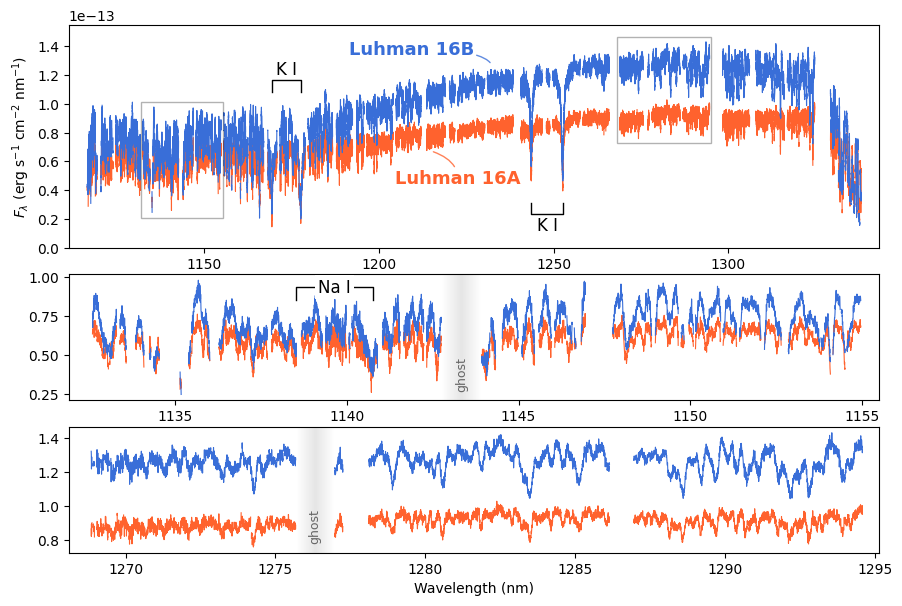

In [23]:
A.load_components(['d_spec'])
B.load_components(['d_spec'])

scale = 1e-13
idx_chips = [[2,3,4],[18,19,20]]

fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(nrows=3, ncols=1, hspace=0.17, wspace=0, height_ratios=[0.47,(1-0.47)/2,(1-0.47)/2])
ax = np.array([fig.add_subplot(gs[0,0]), fig.add_subplot(gs[1,0]), fig.add_subplot(gs[2,0])])

ax[0].plot(A.d_spec['J1226_1'].wave.flatten(), A.d_spec['J1226_1'].flux.flatten(), c=color_A, lw=lw_d)
ax[0].plot(B.d_spec['J1226_1'].wave.flatten(), B.d_spec['J1226_1'].flux.flatten(), c=color_B, lw=lw_d)

#ax[1].plot(A.d_spec['J1226_1'].wave[idx_chips[0]].flatten(), A.d_spec['J1226_1'].flux[idx_chips[0]].flatten()/scale, c=color_A, lw=lw_d)
#ax[1].plot(B.d_spec['J1226_1'].wave[idx_chips[0]].flatten(), B.d_spec['J1226_1'].flux[idx_chips[0]].flatten()/scale, c=color_B, lw=lw_d)
ax[1].plot(A.d_spec['J1226_1'].wave[idx_chips[0]].flatten(), A.d_spec['J1226_1'].flux[idx_chips[0]].flatten()/scale, c=color_A, lw=lw_d)
ax[1].plot(B.d_spec['J1226_1'].wave[idx_chips[0]].flatten(), B.d_spec['J1226_1'].flux[idx_chips[0]].flatten()/scale, c=color_B, lw=lw_d)

ax[2].plot(A.d_spec['J1226_1'].wave[idx_chips[1]].flatten(), A.d_spec['J1226_1'].flux[idx_chips[1]].flatten()/scale, c=color_A, lw=lw_d)
ax[2].plot(B.d_spec['J1226_1'].wave[idx_chips[1]].flatten(), B.d_spec['J1226_1'].flux[idx_chips[1]].flatten()/scale, c=color_B, lw=lw_d)


# Indicate alkali lines
wave_Na = np.array([1e7/8783.82852, 1e7/8766.63258]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax[1], wave_Na, [0.8,0.9], label='Na I')

wave_K = np.array([1e7/8551.81787, 1e7/8491.80409]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax[0], wave_K, [0.7,0.75], label='K I', label_y=0.8)

wave_K = np.array([1e7/7983.67489, 1e7/8041.38112]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax[0], wave_K, [0.2,0.15], label='K I', label_y=0.1)


ax[0].ticklabel_format(axis='y', style='sci', scilimits=(np.log10(scale), np.log10(scale)))
#ax[0].set(xticks=np.arange(1900,2500+1,50))
ax[0].set(
    xlim=(B.d_spec['J1226_1'].wave_ranges_chips.min()-5,B.d_spec['J1226_1'].wave_ranges_chips.max()+5), 
    ylim=(0,1.55e-13), ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', 
    )
ax[1].set(
    xlim=(B.d_spec['J1226_1'].wave_ranges_chips[idx_chips[0]].min()-0.5, B.d_spec['J1226_1'].wave_ranges_chips[idx_chips[0]].max()+0.5), 
    )
ax[2].set(
    xlim=(B.d_spec['J1226_1'].wave_ranges_chips[idx_chips[1]].min()-0.5, B.d_spec['J1226_1'].wave_ranges_chips[idx_chips[1]].max()+0.5), 
    xlabel=r'Wavelength (nm)'
    )

for ax_i in ax[1:]:
    # Plot the inset rectangle(s)
    x0 = ax_i.get_xlim()[0]
    y0 = ax_i.get_ylim()[0]
    width  = np.abs(ax_i.get_xlim()[1] - x0)
    height = np.abs(ax_i.get_ylim()[1] - y0)
    bounds = (x0, y0*scale, width, height*scale)

    _, con_patch = ax[0].indicate_inset(
        bounds=bounds, inset_ax=ax_i, edgecolor='k', alpha=0.3, 
        )
    #for con_patch_j in con_patch:
    #    con_patch_j.set_visible(False)
    [con_patch_j.set_visible(False) for con_patch_j in con_patch]

    # Plot the masked wavelengths due to the ghost signature
    indicate_ghost(ax_i, v_bary=A.d_spec['J1226_1'].v_bary)

# Name labels
ax[0].annotate(
    name_A, xy=(0.45,0.43), xytext=(0.48,0.27), xycoords='axes fraction', ha='center', va='bottom', c=color_A, fontsize=13, fontweight='bold',   
    arrowprops={'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-20', 'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_A, 'alpha':0.8}, 
    )
ax[0].annotate(
    name_B, xy=(0.52,0.83), xytext=(0.5,0.85), xycoords='axes fraction', ha='right', va='bottom', c=color_B, fontsize=13, fontweight='bold', 
    arrowprops={'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=-50', 'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_B, 'alpha':0.8}, 
    )

plt.subplots_adjust(left=0.08, bottom=0.08, top=0.96, right=0.98)
plt.savefig('./plots/J_band_spectrum_new.pdf')
plt.show()

## Best-fitting model

In [30]:
def indicate_molecular_lines(ax, species, xlim, P_0, T_0, v_bary, **kwargs):

    c_species = {'hf':'#FF59B4', 'feh':'#00DBA8', 'h2o':'C3', 'k':'C0', 'na':'C1'}[species]
    filename = f'/net/schenk/data2/regt/opacities_Sid/{species}.hdf5'

    import h5py
    with h5py.File(filename, 'r') as f:
        P = f['P'][:]
        T = f['T'][:]
        
        idx_P = np.argmin(np.abs(10**(P-5.) - P_0))
        idx_T = np.argmin(np.abs(T - T_0))
        #print(f'Closest P: {10**(P[idx_P]-5.)} bar, T: {T[idx_T]} K')

        wave = f['wave'][:] * 1e9
        mask_wave = (wave > xlim[0]) & (wave < xlim[1])
        wave = wave[mask_wave] * (1 + v_bary/3e5)
        
        cross_sec = 10**f['cross_sec'][mask_wave,idx_P,idx_T]

    from scipy.signal import find_peaks
    peaks, *_ = find_peaks(cross_sec)
    if not peaks.size:
        return

    mask = np.ones_like(peaks, dtype=bool)
    if len(peaks) > 10:
        mask = (cross_sec[peaks] > np.quantile(cross_sec[peaks], q=0.9))
    if not mask.any():
        return

    for wave_i, cross_sec_i in zip(wave[peaks][mask], cross_sec[peaks][mask]):
        alpha = 1.0
        handle = ax.axvline(wave_i, alpha=alpha, c=c_species, **kwargs)
    
    return handle


sigma_A = A.get_mean_scaled_uncertainty()
sigma_B = B.get_mean_scaled_uncertainty()

A.load_components(['LogLike'])
B.load_components(['LogLike'])

for i in range(9):

    fig = plt.figure(figsize=(9,3.))
    gs = fig.add_gridspec(
        nrows=4, ncols=1, hspace=0.0, wspace=0, 
        height_ratios=[(0.85-0.02)/2,(0.85-0.02)/2,0.02,0.15], 
    )

    ax = np.array([
        fig.add_subplot(gs[0,0]), 
        fig.add_subplot(gs[1,0]), 
        fig.add_subplot(gs[3,0]), 
    ])

    for j in range(A.d_spec['J1226_1'].n_dets):
        idx_chip_j = i*3 + j
        if idx_chip_j >= 25:
            break

        A_wave_j = A.d_spec['J1226_1'].wave[idx_chip_j]
        A_flux_j = A.d_spec['J1226_1'].flux[idx_chip_j]
        A_m_flux_j = A.LogLike.m_flux_phi[idx_chip_j]

        B_wave_j = B.d_spec['J1226_1'].wave[idx_chip_j]
        B_flux_j = B.d_spec['J1226_1'].flux[idx_chip_j]
        B_m_flux_j = B.LogLike.m_flux_phi[idx_chip_j]

        ax[0].plot(A_wave_j, A_flux_j, c='k', lw=lw_d)
        mask = np.ones_like(A_flux_j)
        mask[np.isnan(A_flux_j)] = np.nan
        ax[0].plot(A_wave_j, mask * A_m_flux_j, c=color_A, lw=lw_m)

        ax[1].plot(B_wave_j, B_flux_j/scale, c='k', lw=lw_d)
        mask = np.ones_like(B_flux_j)
        mask[np.isnan(B_flux_j)] = np.nan
        ax[1].plot(B_wave_j, mask * B_m_flux_j/scale, c=color_B, lw=lw_m)

        ax[2].plot(B_wave_j, (B_flux_j - B_m_flux_j)/scale, c=color_B, lw=lw_d, alpha=res_alpha)
        ax[2].plot(A_wave_j, (A_flux_j - A_m_flux_j)/scale, c=color_A, lw=lw_d, alpha=res_alpha)

    if i == 7:
        ylim = ax[0].get_ylim()
        ylim = (ylim[0]*0.94, ylim[1])
        ax[0].set_ylim(ylim)

    xlim = (
        A.d_spec['J1226_1'].wave_ranges_orders_dets[i,0,0]-0.5, 
        A.d_spec['J1226_1'].wave_ranges_orders_dets[i,-1,-1]+0.6
        )
    for j, ax_j in enumerate(ax):
        # Axis limits            
        if j != len(ax)-1:
            ax_j.set(xlim=xlim, xticks=[])
        else:
            ax_j.set(xlim=xlim, ylim=(-0.12,0.12))

        # Show text only on the first subplot
        indicate_ghost(ax_j, v_bary=A.d_spec['J1226_1'].v_bary, show_text=(j==0), va='top')

    # Errorbar
    ax[-1].axhline(0.0, c='k', lw=ax[-1].spines['left'].get_lw())
    ax[-1].errorbar(
        xlim[1]-0.6+0.15, 0.0, yerr=sigma_A[i]/scale, c=color_A, capsize=2, lw=1.5, capthick=1.5
        )
    ax[-1].errorbar(
        xlim[1]-0.6+0.35, 0.0, yerr=sigma_B[i]/scale, c=color_B, capsize=2, lw=1.5, capthick=1.5
        )

    # Axis ticks
    ax[0].ticklabel_format(axis='y', style='sci', scilimits=(-13,-13))

    decimals0 = [
        len(label_i.get_text().rsplit('.')[1]) \
        for label_i in ax[0].get_yticklabels()
    ]
    decimals1 = [
        len(label_i.get_text().rsplit('.')[1]) \
        for label_i in ax[1].get_yticklabels()
    ]

    decimals = max([*decimals0,*decimals1])
    decimals = max([*decimals0])

    ax[1].yaxis.set_major_formatter(FormatStrFormatter(r'$%.'+str(decimals)+'f$'))
    ax[-1].yaxis.set_major_formatter(FormatStrFormatter(r'$%.1f$'))

    # Name labels
    ha = 'left'; xy = (0.017,0.05)
    if i in [0, 2,3,4,5, 8]:
        # Change location of label
        ha = 'right'; xy = (1-0.017,0.05)
    
    ax[1].annotate(
        name_B, xy=xy, xycoords='axes fraction', ha=ha, va='bottom', c=color_B, fontsize=13, 
        fontweight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
        )
    if i == 7:
        xy = (0.017,0.14)
    ax[0].annotate(
        name_A, xy=xy, xycoords='axes fraction', ha=ha, va='bottom', c=color_A, fontsize=13, 
        fontweight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
        )

    # Axis labels
    ax[0].set_ylabel(r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', y=0)
    ax[-1].set(xlabel=r'Wavelength (nm)', ylabel='Residuals')

    if i == 7:
        indicate_molecular_lines(ax[0], 'h2o', xlim, P_0=1, T_0=1400, v_bary=A.d_spec['J1226_1'].v_bary, lw=0.8, ymin=0.02, ymax=0.065), 
        indicate_molecular_lines(ax[0], 'feh', xlim, P_0=1, T_0=1400, v_bary=A.d_spec['J1226_1'].v_bary, lw=0.8, ymin=0.075, ymax=0.12)
        ax[0].annotate(
            r'$\mathrm{H_2O}$', xy=(0.76,0.07), xycoords='axes fraction', ha='center', va='bottom', 
            c='C3', fontsize=9, clip_on=False,
        )
        ax[0].annotate(
            r'$\mathrm{FeH}$', xy=(0.42,0.12), xycoords='axes fraction', ha='center', va='bottom', 
            c='#00DBA8', fontsize=9, clip_on=False,
        )

        #indicate_molecular_lines(ax[1], 'h2o', xlim, P_0=1, T_0=1400, v_bary=A.d_spec['J1226_1'].v_bary, lw=0.8, ymin=0.93, ymax=0.98)
        #indicate_molecular_lines(ax[1], 'feh', xlim, P_0=1, T_0=1400, v_bary=A.d_spec['J1226_1'].v_bary, lw=0.8, ymin=0.88, ymax=0.93)

        #indicate_molecular_lines(ax[0], 'k', xlim, P_0=1, T_0=1200, v_bary=A.d_spec['J1226_1'].v_bary, lw=0.8, ymin=0., ymax=1.)
        #indicate_molecular_lines(ax[0], 'na', xlim, P_0=1, T_0=1200, v_bary=A.d_spec['J1226_1'].v_bary, lw=0.8, ymin=0., ymax=1.)

    #plt.subplots_adjust(left=0.09, bottom=0.12, top=0.94, right=0.98)
    plt.subplots_adjust(left=0.09, bottom=0.16, top=0.93, right=0.98)
    plt.savefig(f'./plots/J_band_spectrum_bestfit_order{i}_new.pdf')
    #plt.show()
    plt.close()